In [1]:
import numpy as np
from PIL  import Image
import matplotlib.pyplot as plt
import math
import cv2

In [2]:
imgCoin = np.array(Image.open('images/coins.jpg'))
imgHibiscus = np.array(Image.open('images/hibiscus.bmp'))

In [3]:
def show_2images(img1, img2):

    f = plt.figure(figsize=(10,8))
    ax1 = f.add_subplot(221)
    ax2 = f.add_subplot(222)

    ax1.margins(0.05)
    if(len(img1.shape)== 2):
        ax1.imshow(img1,cmap='gray')
    else:
        ax1.imshow(img1)
    ax1.set_title('Coin')

    ax2.margins(0.05) 
    if(len(img2.shape)== 2):
        ax2.imshow(img2,cmap='gray')
    else:
        ax2.imshow(img2)
    
    ax2.set_title('Hibiscus')
    
    plt.show()

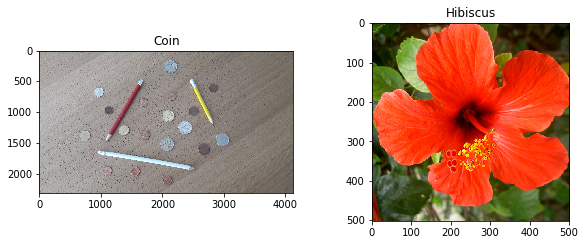

In [4]:
show_2images(imgCoin,imgHibiscus)

In [5]:

def get_percent_histogram(img): # for gray scale images
    hist = np.histogram(img, bins=np.arange(256))[0].astype(np.float32)
    return hist.astype(np.float32) / img.size

def make_class_probability(hist, omega_i, inf, sup):
    return (np.sum(np.array([index * hist[index] for index in range(inf, sup)]))) / omega_i

def otsu(img):
    hist_percent  = get_percent_histogram(img)
    res = np.full(256, np.nan).astype(np.float32)
    for i in range(0, 255):
        omega_0_i = np.sum(hist_percent[:i + 1]) # left part probability
        omega_1_i = np.sum(hist_percent[i + 1:]) # right part probability
        nu_0_i = make_class_probability(hist_percent, omega_0_i, 0, i + 1) 
        nu_1_i = make_class_probability(hist_percent, omega_1_i, i + 1, 255)
        res[i] = omega_0_i * omega_1_i * ((nu_0_i - nu_1_i) ** 2) # storing the inter-class variance
    maxindex = np.argmax(res[~np.isnan(res)]) # getting the maximum of inter-class variance
    img_copy = np.array(img)
    img_copy[img_copy <= maxindex] = 0
    img_copy[img_copy > maxindex] = 255
    return img_copy

    

In [6]:
imgCoinByChannel = np.transpose(imgCoin, (2,0,1))
imgHibiscusByChannel = np.transpose(imgHibiscus, (2,0,1))


## Red Channel
### Before otsu

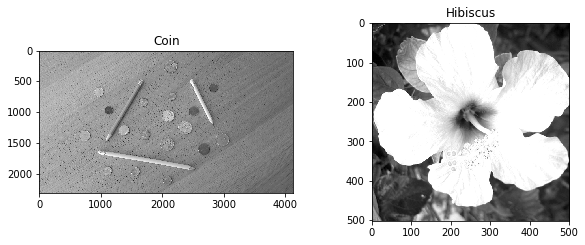

In [7]:
show_2images(imgCoinByChannel[0],imgHibiscusByChannel[0])

### After Otsu

/home/bjorn/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


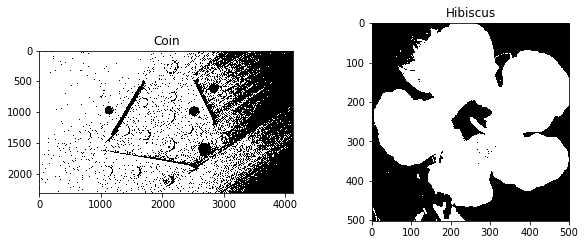

In [8]:
show_2images(otsu(imgCoinByChannel[0]),otsu(imgHibiscusByChannel[0]))